In [2]:
import numpy as np
import tensorflow as tf
import pandas as pd

RANDOM_SEED = 42

2022-10-15 10:19:22.371427: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Specify Paths

In [3]:
data_path = './data/data.csv'
model_path = './model.joblib'

### Load training Data

In [4]:
df = pd.read_csv(data_path, low_memory=False)
df

,label,T-31_P0x,T-31_P0y,T-31_P0z,T-31_P1x,T-31_P1y,T-31_P1z,T-31_P2x,T-31_P2y,T-31_P2z,...,T-0_P17z,T-0_P18x,T-0_P18y,T-0_P18z,T-0_P19x,T-0_P19y,T-0_P19z,T-0_P20x,T-0_P20y,T-0_P20z
0,0.0,0.113381,0.268793,1.280936e-09,0.130973,0.254694,-0.004757,0.143160,0.228054,-0.006853,...,-0.006671,0.091880,0.185301,-0.009913,0.089176,0.168656,-0.013089,0.087385,0.152947,-0.015391
1,0.0,0.121186,0.291912,2.489339e-09,0.137831,0.265224,-0.004967,0.143932,0.228545,-0.007737,...,-0.007297,0.104067,0.174105,-0.009927,0.103812,0.159658,-0.012272,0.104157,0.145959,-0.013994
2,0.0,0.132947,0.236671,1.095227e-09,0.146743,0.226843,-0.005006,0.156903,0.207639,-0.007951,...,-0.005851,0.123724,0.156173,-0.008721,0.123991,0.145032,-0.011450,0.124630,0.134762,-0.013537
3,0.0,0.129225,0.251496,1.801411e-09,0.141349,0.237368,-0.006805,0.148107,0.213648,-0.010710,...,-0.007682,0.106214,0.176256,-0.011057,0.104717,0.163414,-0.014013,0.103920,0.150912,-0.016225
4,0.0,0.121115,0.262475,9.480268e-10,0.135301,0.248368,-0.006307,0.144226,0.223712,-0.009278,...,-0.009226,0.118955,0.159775,-0.012364,0.119625,0.145471,-0.014831,0.120997,0.131798,-0.016644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,3.0,0.128237,0.138448,-5.648560e-10,0.136612,0.141773,-0.001529,0.142752,0.153267,-0.004622,...,-0.018390,0.131262,0.170219,-0.020882,0.132501,0.174314,-0.018193,0.133075,0.173403,-0.015932
1196,3.0,0.130820,0.134602,2.379616e-10,0.139894,0.138663,-0.004973,0.147616,0.147924,-0.009732,...,-0.006674,0.196171,0.075305,-0.009298,0.197266,0.069849,-0.010918,0.198501,0.064485,-0.012065
1197,3.0,0.188688,0.105211,3.089780e-10,0.195672,0.105348,0.000091,0.201780,0.100662,-0.001163,...,-0.001095,0.194070,0.080062,-0.000545,0.195419,0.075263,0.000007,0.196595,0.071228,0.000171
1198,3.0,0.191797,0.103154,-8.426666e-11,0.199300,0.101957,-0.000555,0.205943,0.094543,-0.001541,...,-0.006096,0.208784,0.034157,-0.005941,0.208669,0.035267,-0.005332,0.207987,0.033320,-0.005338


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:],
                                                    df['label'],
                                                    random_state=104,
                                                    test_size=0.25,
                                                    shuffle=True)


In [8]:
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt

sns.set(rc={"figure.figsize":(6, 5)})

def print_stats(y_pred):
    print(f'accuracy:\t {metrics.accuracy_score(y_test, y_pred)}')
    print(f'precision:\t {metrics.precision_score(y_test, y_pred, average="macro")}')
    print(f'recall:\t\t {metrics.recall_score(y_test, y_pred, average="macro")}')
    print(f'f-score:\t {metrics.f1_score(y_test, y_pred, average="macro")}')
    cf_matrix = metrics.confusion_matrix(y_test, y_pred)
    cf_matrix_n = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cf_matrix, cmap='Greens', annot=True)
    plt.ylabel('Actual', size=14)
    plt.xlabel('Predicted', size=14)
    plt.title('confusion matrix', size=18)
    plt.show(block=False)
    sns.heatmap(cf_matrix_n, cmap='Blues', annot=True)
    plt.ylabel('Actual', size=14)
    plt.xlabel('Predicted', size=14)
    plt.title('confusion matrix percentages', size=18)
    plt.show(block=False)

### Logistic Regression Baseline

In [9]:
from sklearn.linear_model import LogisticRegression

log_base = LogisticRegression(max_iter=1000)
log_base.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

accuracy:	 0.8833333333333333
precision:	 0.9059631244971107
recall:		 0.8833002901769429
f-score:	 0.8891321146311972


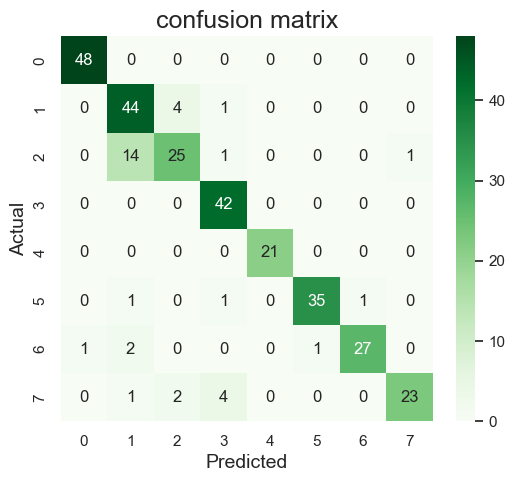

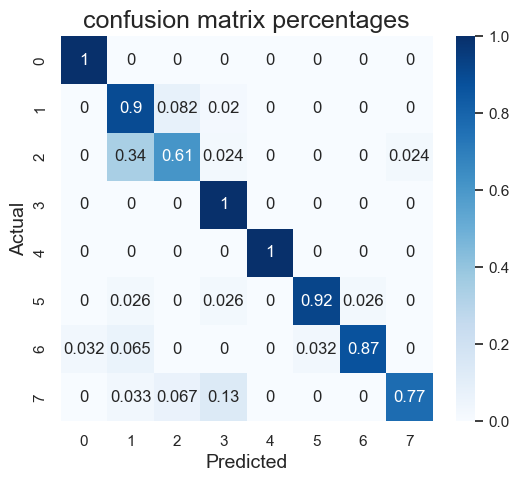

In [19]:
print_stats(log_base.predict(X_test))

### Neural Network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

def get_nn(activation='relu', dropout=0.1):
    nn = Sequential()
    nn.add(layers.Dense(X_train.shape[1], activation=activation, input_shape=(784,)))
    nn.add(layers.Dropout(dropout))
    nn.add(layers.Dense(128, activation=activation))
    nn.add(layers.Dropout(dropout))
    nn.add(layers.Dense(64, activation=activation))
    nn.add(layers.Dense())

    return nn

In [20]:
import joblib

joblib.dump(log_base, model_path)

['./model.joblib']